<a href="https://colab.research.google.com/github/kentokura/python_medical_images/blob/master/chapter3/charp3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## 3.3 シングルチャンネル画像とマルチチャンネル画像


本節の学び
- 画像からカラーチャンネル数を調べる。
- Lena(RGB)のピクセル値を1つ調べ、RGBを確認する。
- Lena(RGB)をシングルチャンネルに分解する。
- 分解したLenaのシングルチャンネル画像をRGBカラー画像に戻す。
- Lena(RGB)をシングルチャンネルに変換しLUTを設定する。

**WHAT'S LUT?**
LUT: look up tableの略
入力色データに対応する出力色データを参照する対応表。

### 3.3.1 カラーチャンネル

ピクセルが色を表現するために保持できる値の数をカラーチャンネルと呼ぶ。
１つのピクセル値に単一の値のみをもつ画像をシングルチャンネル、複数の値をもつものはマルチチャンネルと呼ばれる。

bgr -> rgbにcvtColorを使用している

In [2]:
# 画像をロード
bgr = cv2.imread('/content/drive/My Drive/DATASET/dataset/lena-rgb.png',
                 flags=cv2.IMREAD_UNCHANGED)
# BGRカラーをRGBに変換する
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

# グレースケール画像をロード
gray = cv2.imread('/content/drive/My Drive/DATASET/dataset/lena-gray.png',
                 flags=cv2.IMREAD_UNCHANGED)


# カラーチャンネルを調べる
#ndarrayのshapから調べる
height, width, channel = rgb.shape
print(height, width, channel)
height, width = gray.shape
print(height, width)
#ピクセル値から調べる
rgb100 = rgb[100,100,:]
gray100 = gray[100, 100]
print("color pixel",rgb100)
print("gray pixel",gray100)


512 512 3
512 512
color pixel [178  68  78]
gray pixel 108


### 3.3.2 RGBカラー

加法混合です。

### 3.3.3 カラー画像の構成(24-bit, 32-bit)

R,G,B成分それぞれに8-bit, (apphaチャンネルが8-bit).

alpha が先頭ならaRGB, 尾側(**びそく**)ならRGBaと読む.

### 3.3.4 割愛

### 3.3.5 RGBとグレースケール
カラー画像でもグレースケールが作れる.
全部同じ値にする.

初歩的な画像処理にカラー画像をグレースケールに変換する処理がある。
これは、RGBの平均値などをRGBすべての要素に代入しなおすことで表現できる。

### 3.3.6 カラーチャンネルの分解と合成


リスト 3.3.2 カラーチャンネルの分解と合成

rgbには3次元のnp.ndarrayが入っている。

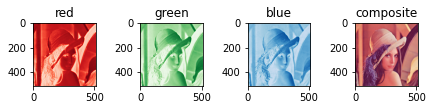

In [13]:
import matplotlib.pyplot as plt
import numpy as np

bgr = cv2.imread("/content/drive/My Drive/DATASET/dataset/lena-rgb.png", 
                  cv2.IMREAD_UNCHANGED)
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

# RGB成分の分解
images = []
r_channel = rgb[:,:,0]
g_channel = rgb[:,:,1]
b_channel = rgb[:,:,2]
images.append(r_channel)
images.append(g_channel)
images.append(b_channel)
# 画像を表示して確かめる
for i in range(3):
  plt.subplot(1, 4, (i+1))
  plt.tight_layout()
  if i == 0:
    plt.title("red")
    plt.imshow(images[i], cmap="Reds")
  if i == 1:
    plt.title("green")
    plt.imshow(images[i], cmap="Greens")
  if i == 2:
    plt.title("blue")
    plt.imshow(images[i], cmap="Blues")
# 元に戻す (合成)
# もとに戻すにはRGB順にシングルチャンネルをもつ多次元配列を作ればよい
pixels = np.uint8(np.zeros((512,512,3)))
pixels[:,:,0] = r_channel
pixels[:,:,1] = g_channel
pixels[:,:,2] = b_channel
plt.subplot(1, 4, 4)
plt.title("composite")
plt.imshow(pixels)

### 3.3.7 RGB と BGR
プログラミングライブラリによっては、RGBの逆のBGRオーダーで処理する。
OpenCVはBGRオーダーである。近藤しないように注意。

### 3.3.8 グレースケール画像(シングルチャンネル)とカラールックアップテーブル

キーワード
- LUT
- 階調変数関数

